In [4]:
%matplotlib inline
isdark = False
from rayoptics.environment import *
from rayoptics.elem.elements import Element
from rayoptics.raytr.trace import apply_paraxial_vignetting

# JP 2020-177057 Example 1 (Nikon AF-S Nikkor 120-300mm f/2.8E FL ED SR VR)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

# Surface[1] = type=S radius=321.6694 thickness=5.2 diameter = 101.62 nd = 1.90265 vd = 35.77
# Surface[2] = type=S radius=151.607 thickness=13.4 diameter = 99.22 nd = 1.49782 vd = 82.57
# Surface[3] = type=S radius=-748.4933 thickness=0.1 diameter = 99.22 nd = 0 vd = 0
# Surface[4] = type=S radius=135.4106 thickness=13.2 diameter = 98.42 nd = 1.433843 vd = 95.27
# Surface[5] = type=S radius=0 thickness=66.471 diameter = 98.42 nd = 0 vd = 0
# Surface[6] = type=S radius=124.3594 thickness=7.6 diameter = 70.94 nd = 1.720467 vd = 34.71
# Surface[7] = type=S radius=1981.8668 thickness=12.972 diameter = 70.94 nd = 0 vd = 0
# Surface[8] = type=S radius=275.6157 thickness=4.7 diameter = 55.74 nd = 1.71736 vd = 29.53
# Surface[9] = type=S radius=-275.46 thickness=2.85 diameter = 54.42 nd = 1.6968 vd = 55.52
# Surface[10] = type=S radius=109.0902 thickness=3.124 diameter = 50.47 nd = 0 vd = 0
# Surface[11] = type=S radius=-1986.3568 thickness=2.65 diameter = 50.47 nd = 1.804 vd = 46.6
# Surface[12] = type=S radius=57.14 thickness=3.7 diameter = 48.54 nd = 1.75575 vd = 24.71
# Surface[13] = type=S radius=86.0604 thickness=6.757 diameter = 47.48 nd = 0 vd = 0
# Surface[14] = type=S radius=-84.2865 thickness=2.5 diameter = 47.48 nd = 1.870705 vd = 40.73
# Surface[15] = type=S radius=-651.8818 thickness=1.56 diameter = 48.54 nd = 0 vd = 0
# Surface[16] = type=S radius=605.0183 thickness=4.7 diameter = 50.36 nd = 1.755 vd = 52.34
# Surface[17] = type=S radius=-156.1367 thickness=0.1 diameter = 50.36 nd = 0 vd = 0
# Surface[18] = type=S radius=88.3742 thickness=6.8 diameter = 49.86 nd = 1.433843 vd = 95.27
# Surface[19] = type=S radius=-277.5645 thickness=1.626 diameter = 49.86 nd = 0 vd = 0
# Surface[20] = type=S radius=-115.6316 thickness=4.7 diameter = 49 nd = 1.65413 vd = 39.72
# Surface[21] = type=S radius=88.6408 thickness=1.061 diameter = 49 nd = 0 vd = 0
# Surface[22] = type=S radius=123.7096 thickness=5.3 diameter = 49 nd = 1.91082 vd = 35.25
# Surface[23] = type=S radius=-404.2232 thickness=18.669 diameter = 49 nd = 0 vd = 0
# Surface[24] = type=S radius=0 thickness=4 diameter = 46.96 nd = 1.804 vd = 46.6
# Surface[25] = type=S radius=-118.3357 thickness=0.1 diameter = 46.96 nd = 0 vd = 0
# Surface[26] = type=S radius=63.0226 thickness=6.8 diameter = 43.88 nd = 1.59349 vd = 67
# Surface[27] = type=S radius=-199.138 thickness=1.8 diameter = 43.54 nd = 1.84666 vd = 23.82
# Surface[28] = type=S radius=199.011 thickness=8.542 diameter = 43.54 nd = 0 vd = 0
# Surface[29] = type=S radius=-145.6141 thickness=1.9 diameter = 36.72 nd = 2.001 vd = 29.12
# Surface[30] = type=S radius=91.0903 thickness=5.002 diameter = 36.72 nd = 0 vd = 0
# Surface[31] = type=AS radius=0 thickness=8 diameter = 34.295 nd = 0 vd = 0
# Surface[32] = type=S radius=375.1468 thickness=5 diameter = 36.1 nd = 1.72916 vd = 54.61
# Surface[33] = type=S radius=-83.7956 thickness=3.919 diameter = 36.1 nd = 0 vd = 0
# Surface[34] = type=S radius=368.0922 thickness=2 diameter = 34.18 nd = 1.870705 vd = 40.73
# Surface[35] = type=S radius=93.4714 thickness=2.746 diameter = 34.18 nd = 0 vd = 0
# Surface[36] = type=S radius=-148.9288 thickness=3.6 diameter = 33.96 nd = 1.80518 vd = 25.41
# Surface[37] = type=S radius=-54.337 thickness=1.9 diameter = 33.96 nd = 1.5168 vd = 64.14
# Surface[38] = type=S radius=107.7701 thickness=5.617 diameter = 33.96 nd = 0 vd = 0
# Surface[39] = type=FS radius=0 thickness=8.829 diameter = 34 nd = 0 vd = 0
# Surface[40] = type=S radius=79.609 thickness=4.4 diameter = 38.44 nd = 2.001 vd = 29.12
# Surface[41] = type=S radius=-1873.4336 thickness=0.782 diameter = 38.44 nd = 0 vd = 0
# Surface[42] = type=S radius=64.0354 thickness=3 diameter = 38.66 nd = 1.804 vd = 46.6
# Surface[43] = type=S radius=33.609 thickness=10 diameter = 36.74 nd = 1.48749 vd = 70.31
# Surface[44] = type=S radius=-77.3539 thickness=6.728 diameter = 36.74 nd = 0 vd = 0
# Surface[45] = type=S radius=-70.8535 thickness=2 diameter = 34.6 nd = 1.90043 vd = 37.38
# Surface[46] = type=S radius=224.495 thickness=54.819 diameter = 34.6 nd = 0 vd = 0



In [5]:
from rayoptics.seq.medium import InterpolatedGlass

gCaF2 = InterpolatedGlass('CaF2', [
    (1013.98, 1.42879),
    (852.11, 1.43002),
    (706.62, 1.43166),
    (656.2725, 1.43245), 
    (643.85, 1.43267),
    (632.80, 1.43288),
    (589.29, 1.43380),
    (587.5618, 1.43384),
    (546.08, 1.43492),
    (486.1327, 1.43700),
    (479.99, 1.43726),
    (435.84, 1.43946),
    (404.66, 1.44148),
    (365.02, 1.44488)])

gJ_LASF015 = InterpolatedGlass('J-LASF015', [
    (1013.98, 1.78553),
    (852.11, 1.78994),
    (768.15, 1.793033),
    (706.62, 1.795917),
    (656.2725, 1.798824), 
    (643.85, 1.799643),
    (632.80, 1.800408),
    (589.29, 1.803847),
    (587.5618, 1.804000),
    (546.08, 1.808106),
    (486.1327, 1.816078),
    (479.99, 1.817079),
    (435.84, 1.825697),
    (404.66, 1.833795),
    (388.865, 1.838784),
    (365.02, 1.847835)])

gJ_SFH5 = InterpolatedGlass('J-SFH5', [
    (1013.98, 1.72667),
    (852.11, 1.73306),
    (768.15, 1.737788),
    (706.62, 1.742335),
    (656.2725, 1.747048), 
    (643.85, 1.748398),
    (632.80, 1.749669),
    (589.29, 1.755488),
    (587.5618, 1.755750),
    (546.08, 1.762936),
    (486.1327, 1.777633),
    (479.99, 1.779553),
    (435.84, 1.796874),
    (404.66, 1.814702),
    (388.865, 1.826650),
    (365.02, 1.850772)])


0 Surface(lbl='Obj', profile=Spherical(c=0.0), interact_mode=dummy)
1 Surface(profile=Spherical(c=0.003108781873563354), interact_mode=transmit)
2 Surface(profile=Spherical(c=0.006596001503888343), interact_mode=transmit)
3 Surface(profile=Spherical(c=-0.001336017303027295), interact_mode=transmit)
4 Surface(profile=Spherical(c=0.007384946230206499), interact_mode=transmit)
5 Surface(profile=Spherical(c=0.0), interact_mode=transmit)
6 Surface(profile=Spherical(c=0.008041209590911504), interact_mode=transmit)
7 Surface(profile=Spherical(c=0.0005045747776793072), interact_mode=transmit)
8 Surface(profile=Spherical(c=0.003628240336091159), interact_mode=transmit)
9 Surface(profile=Spherical(c=-0.003630291149350178), interact_mode=transmit)
10 Surface(profile=Spherical(c=0.009166726250387294), interact_mode=transmit)
11 Surface(profile=Spherical(c=-0.0005034342269223737), interact_mode=transmit)
12 Surface(profile=Spherical(c=0.01750087504375219), interact_mode=transmit)
13 Surface(profile

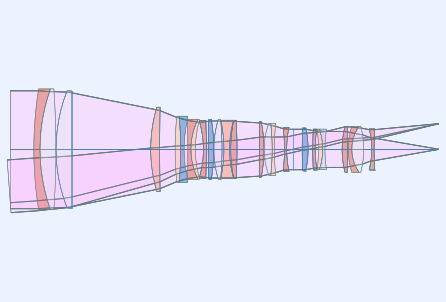

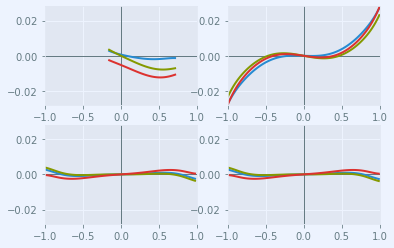

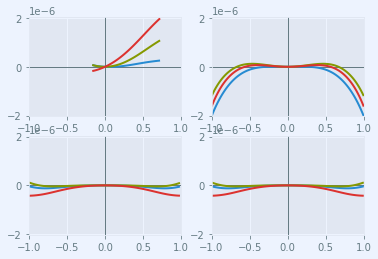

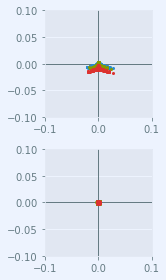

In [6]:
# JP 2020-177057 Example 1 (Nikon AF-S Nikkor 120-300mm f/2.8E FL ED SR VR)
# Obtained via https://www.photonstophotos.net/GeneralTopics/Lenses/OpticalBench/OpticalBenchHub.htm

opm = OpticalModel()
sm  = opm.seq_model
osp = opm.optical_spec
pm = opm.parax_model
osp.pupil = PupilSpec(osp, key=['image', 'f/#'], value=2.91)
osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], flds=[0., 4.145])
osp.spectral_region = WvlSpec([(486.1327, 0.5), (587.5618, 1.0), (656.2725, 0.5)], ref_wl=1)
opm.system_spec.title = "JP 2020-177057 Example 1 (Nikon AF-S Nikkor 120-300mm f/2.8E FL ED SR VR)"
opm.system_spec.dimensions = 'MM'
opm.radius_mode = True
sm.gaps[0].thi=1e10
sm.add_surface([321.6694,5.2,'J-LASFH9A','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 50.81
sm.add_surface([151.607,13.4,'J-FKH1','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 49.61
sm.add_surface([-748.4933,0.1])
sm.ifcs[sm.cur_surface].max_aperture = 49.61
sm.add_surface([135.4106,13.2,1.433843,95.27])
sm.gaps[sm.cur_surface].medium = gCaF2
sm.ifcs[sm.cur_surface].max_aperture = 49.21
sm.add_surface([0.0,66.471])
sm.ifcs[sm.cur_surface].max_aperture = 49.21
sm.add_surface([124.3594,7.6,'N-KZFS8','Schott'])
sm.ifcs[sm.cur_surface].max_aperture = 35.47
sm.add_surface([1981.8668,12.972])
sm.ifcs[sm.cur_surface].max_aperture = 35.47
sm.add_surface([275.6157,4.7,'J-SF1','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 27.87
sm.add_surface([-275.46,2.85,'J-LAK14','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 27.21
sm.add_surface([109.0902,3.124])
sm.ifcs[sm.cur_surface].max_aperture = 25.235
sm.add_surface([-1986.3568,2.65,'J-LASF015','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 25.235
sm.add_surface([57.14,3.7,'J-SFH5','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 24.27
sm.add_surface([86.0604,6.757])
sm.ifcs[sm.cur_surface].max_aperture = 23.74
sm.add_surface([-84.2865,2.5,'TAFD32','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 23.74
sm.add_surface([-651.8818,1.56])
sm.ifcs[sm.cur_surface].max_aperture = 24.27
sm.add_surface([605.0183,4.7,'J-LASKH2','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 25.18
sm.add_surface([-156.1367,0.1])
sm.ifcs[sm.cur_surface].max_aperture = 25.18
sm.add_surface([88.3742,6.8,1.433843,95.27])
sm.gaps[sm.cur_surface].medium = gCaF2
sm.ifcs[sm.cur_surface].max_aperture = 24.93
sm.add_surface([-277.5645,1.626])
sm.ifcs[sm.cur_surface].max_aperture = 24.93
sm.add_surface([-115.6316,4.7,'N-KZFS5','Schott'])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([88.6408,1.061])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([123.7096,5.3,'TAFD35','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([-404.2232,18.669])
sm.ifcs[sm.cur_surface].max_aperture = 24.5
sm.add_surface([0.0,4.0,'J-LASF015','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 23.48
sm.add_surface([-118.3357,0.1])
sm.ifcs[sm.cur_surface].max_aperture = 23.48
sm.add_surface([63.0226,6.8,'J-PSKH4','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 21.94
sm.add_surface([-199.138,1.8,'J-SF03','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 21.77
sm.add_surface([199.011,8.542])
sm.ifcs[sm.cur_surface].max_aperture = 21.77
sm.add_surface([-145.6141,1.9,'J-LASFH16','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 18.36
sm.add_surface([91.0903,5.002])
sm.ifcs[sm.cur_surface].max_aperture = 18.36
sm.add_surface([0.0,8.0])
sm.set_stop()
sm.ifcs[sm.cur_surface].max_aperture = 17.1475
sm.add_surface([375.1468,5.0,'J-LAK18','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 18.05
sm.add_surface([-83.7956,3.919])
sm.ifcs[sm.cur_surface].max_aperture = 18.05
sm.add_surface([368.0922,2.0,'TAFD32','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 17.09
sm.add_surface([93.4714,2.746])
sm.ifcs[sm.cur_surface].max_aperture = 17.09
sm.add_surface([-148.9288,3.6,'J-SF6','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 16.98
sm.add_surface([-54.337,1.9,'J-BK7A','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 16.98
sm.add_surface([107.7701,14.446000000000002])
sm.ifcs[sm.cur_surface].max_aperture = 16.98
sm.add_surface([79.609,4.4,'J-LASFH16','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 19.22
sm.add_surface([-1873.4336,0.782])
sm.ifcs[sm.cur_surface].max_aperture = 19.22
sm.add_surface([64.0354,3.0,'J-LASF015','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 19.33
sm.add_surface([33.609,10.0,'J-FK5','Hikari'])
sm.ifcs[sm.cur_surface].max_aperture = 18.37
sm.add_surface([-77.3539,6.728])
sm.ifcs[sm.cur_surface].max_aperture = 18.37
sm.add_surface([-70.8535,2.0,'TAFD37','Hoya'])
sm.ifcs[sm.cur_surface].max_aperture = 17.3
sm.add_surface([224.495,54.819])
sm.ifcs[sm.cur_surface].max_aperture = 17.3
sm.list_surfaces()
sm.list_gaps()
sm.do_apertures = False
opm.update_model()
apply_paraxial_vignetting(opm)
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, do_draw_rays=True, do_paraxial_layout=False,
                        is_dark=isdark).plot()
sm.list_model()
# List the optical specifications
pm.first_order_data()
# List the paraxial model
pm.list_lens()
# Plot the transverse ray aberrations
abr_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='Ray', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot the wavefront aberration
wav_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm,
          data_type='OPD', scale_type=Fit.All_Same, is_dark=isdark).plot()
# Plot spot diagrams
spot_plt = plt.figure(FigureClass=SpotDiagramFigure, opt_model=opm, 
                      scale_type=Fit.User_Scale, user_scale_value=0.1, is_dark=isdark).plot()
